In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

% matplotlib inline

In [2]:
fname = "210315//210315_Bi2Te3_p5_temp_coeff_test.txt"
df = pd.read_csv(fname, sep = ",", header = 0)
#Rref = 3 #ohms

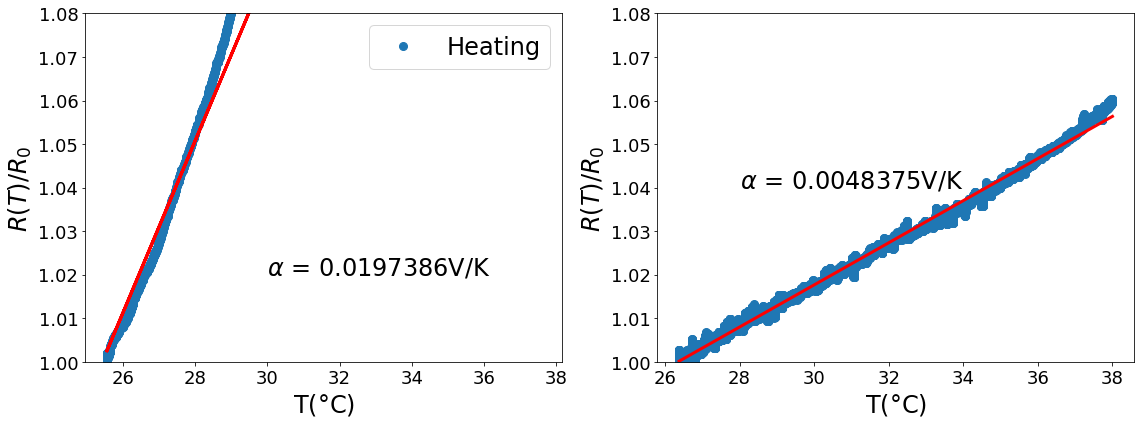

In [43]:
df['Tl'] = 9.91684E-6 * df['RTDl']**2 + 0.23605 * df['RTDl'] - 245.96823
df['Tr'] = 9.91684E-6 * df['RTDr']**2 + 0.23605 * df['RTDr'] - 245.96823
df['Tavg'] = (df['Tl'] + df['Tr']) / 2
#df['Rsamp'] = df['Vsamp'] / df['Vref'] * Rref

fig, axs = plt.subplots(1,2, figsize = (16,6))
fz = 24 #fontsize
ylim = [1, 1.08]
mask = df['Rsamp'].idxmax()
#heating
x = df['Tavg'][0 : mask]
y = df['Rsamp'][0 : mask] / df['Rsamp'].iloc[0]
m1, b1 = np.polyfit(x, y, 1)
axs[0].plot(x, y, marker = 'o', markersize = 8, ls = " ", label = 'Heating')
axs[0].plot(x, np.polyval([m1,b1], x), color = 'red', linewidth = 3)
axs[0].text(30, 1.02, rf'$\alpha$ = {round(m1,7)}V/K', fontsize = fz)
axs[0].set_xlabel(r'T($\degree$C)', fontsize = fz)
axs[0].set_ylabel(r'$R(T) / R_0$', fontsize = fz)
axs[0].set_ylim(ylim)
axs[0].legend(fontsize = fz)
axs[0].tick_params(labelsize=18)

#mask = np.where(df['Tavg'] > 37.9 & df['Tavg'] < 38.0)
mask = 24787
#cooling
x = df['Tavg'][mask:]
y = df['Rsamp'][mask:] / df['Rsamp'].iloc[0]
m2, b2 = np.polyfit(x, y, 1)
axs[1].plot(x, y, marker = 'o', markersize = 8, ls = " ", label = 'Cooling')
axs[1].plot(x, np.polyval([m2,b2], x), color = 'red', linewidth = 3)
axs[1].text(28, 1.04, rf'$\alpha$ = {round(m2,7)}V/K', fontsize = fz)
axs[1].set_xlabel(r'T($\degree$C)', fontsize = fz)
axs[1].set_ylabel(r'$R(T) / R_0$', fontsize = fz)
#axs[1].legend(fontsize = fz)
axs[1].tick_params(labelsize=18)
axs[1].set_ylim(ylim)
plt.tight_layout()

fig.savefig(fname[:-4] + "_analysis.jpg", dpi = 100)

In [7]:
mask = np.where((df['Tavg'] > 37.9) & (df['Tavg'] < 38.0))
mask

(array([ 7508,  7509,  7510,  7511,  7512,  7513,  7514,  7515,  7516,
         7517,  7518,  7519,  7520,  7521,  7522,  7523,  7524,  7525,
         7526,  7527,  7528,  7529,  7530,  7531,  7532,  7533,  7534,
         7535,  7536,  7537,  7538,  7539,  7540,  7541,  7542,  7543,
         7544,  7545,  7546,  7547,  7548,  7549,  7550,  7551,  7552,
         7553,  7554,  7555,  7556,  7557,  7558,  7559,  7560,  7561,
         7562,  7563,  7564,  7565,  7566,  7567,  7568,  7569,  7570,
         7571,  7572,  7573,  7574,  7575,  7576,  7577,  7578,  7579,
         7580,  7581,  7582,  7583,  7584,  7585,  7586,  7587,  7588,
         7589,  7590,  7591,  7592,  7593,  7594,  7595,  7596,  7597,
         7598,  7599,  7600,  7601, 24787, 24788, 24789, 24790, 24791,
        24792, 24793, 24794, 24795, 24796, 24797, 24798, 24799, 24800,
        24801, 24802, 24803, 24804, 24805, 24806, 24807, 24808, 24809,
        24810, 24811, 24812, 24813, 24814, 24815, 24816, 24817, 24818,
      

In [32]:
for i in range(1, len(mask[0]), 1):
    if (mask[0][i] - mask[0][i - 1]) > 10:
        print(mask[0][i])
        break

24787


1
